In [2]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# metadata
print(breast_cancer_wisconsin_original.metadata)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [11]:
# variable information
print(breast_cancer_wisconsin_original.variables)

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/15/data.csv')
data.head(5)

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [35]:
data.shape

(699, 11)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_of_cell_size      699 non-null    int64  
 3   Uniformity_of_cell_shape     699 non-null    int64  
 4   Marginal_adhesion            699 non-null    int64  
 5   Single_epithelial_cell_size  699 non-null    int64  
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              699 non-null    int64  
 8   Normal_nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [36]:
data.describe()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## 1. Información del dataset


In [21]:
# Extraer características y etiquetas
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# Mostrar información básica del conjunto de datos
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


### Descripción estadística

In [22]:
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [28]:
X.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


## Análisis exploratorio de datos

Class
2        458
4        241
Name: count, dtype: int64


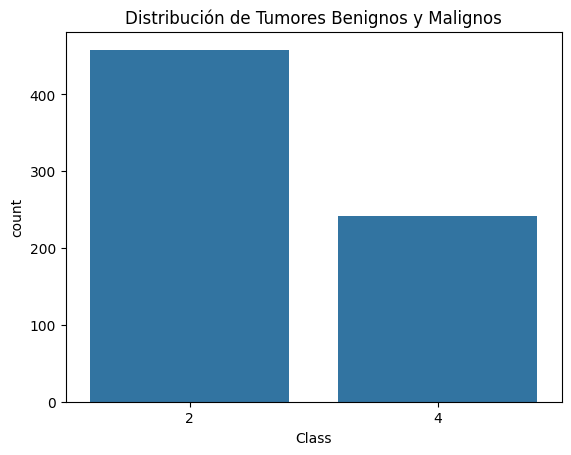

In [39]:
print(y.value_counts())
sns.countplot(x=y['Class'])
plt.title("Distribución de Tumores Benignos y Malignos")
plt.show()